<a href="https://colab.research.google.com/github/BOMBBAAM/AI-classworks/blob/main/state-space-search-8-Puzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

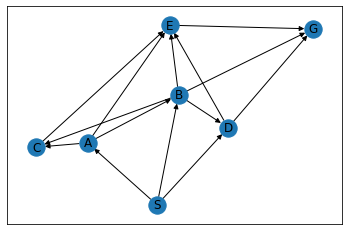

In [ ]:
import networkx as nx
 
g = nx.DiGraph()
edges = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}
edge_list = []
for s in edges.keys():
  for c in edges[s]:
    edge_list.append((s,c))
g.add_edges_from(edge_list)
nx.draw_networkx(g)

# DFS 

**HW** ในชั้นเรียน ให้แก้โปรแกรมเพื่อให้กลายเป็น BFS 

In [ ]:
last_index = 0
visited_node = []

def gen_successors(node):
    global last_index
    graph = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}
    node_id = node[1]
    level = node[3]
    ret = []
    for c in graph[node[0]]:
        ret += [(c,last_index+1,node[1],node[3]+1)]
        last_index += 1
    return ret
    
def is_goal(node):
    return node[0] == 'G'

def insert_all(node,fringe):
    children = gen_successors(node)
    for child in children:
        fringe[0:0] = [child] 
    print(fringe)

def show_result(g):
    global visited_node
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0],end=' ')
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def dfs(start_node,limited_level):
    global last_index
    global visited_node
    last_index = 0
    fringe = [start_node]
    print(fringe)
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        if is_goal(front):
            show_result(front)
            return True
        if front[3] == limited_level:
            continue
        insert_all(front,fringe)

dfs(('S',0,-1,0),30)

[('S', 0, -1, 0)]
[('D', 3, 0, 1), ('B', 2, 0, 1), ('A', 1, 0, 1)]
[('G', 5, 3, 2), ('E', 4, 3, 2), ('B', 2, 0, 1), ('A', 1, 0, 1)]
G D S 

True

# BFS edited from above DFS

In [ ]:
last_index = 0
visited_node = []

def gen_successors(node):
    global last_index
    graph = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}
    node_id = node[1]
    level = node[3]
    ret = []
    for c in graph[node[0]]:
        ret += [(c,last_index+1,node[1],node[3]+1)]
        last_index += 1
    return ret
    
def is_goal(node):
    return node[0] == 'G'

def insert_all(node,fringe):
    children = gen_successors(node)
    for child in children:
        fringe[len(fringe):] = [child]      # changed this line
    print(fringe)

def show_result(g):
    global visited_node
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0],end=' ')
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def bfs(start_node,limited_level):
    global last_index
    global visited_node
    last_index = 0
    fringe = [start_node]
    print(fringe)
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        if is_goal(front):
            show_result(front)
            return True
        if front[3] == limited_level:
            continue
        insert_all(front,fringe)

bfs(('S',0,-1,0),30)

[('S', 0, -1, 0)]
[('A', 1, 0, 1), ('B', 2, 0, 1), ('D', 3, 0, 1)]
[('B', 2, 0, 1), ('D', 3, 0, 1), ('B', 4, 1, 2), ('C', 5, 1, 2), ('E', 6, 1, 2)]
[('D', 3, 0, 1), ('B', 4, 1, 2), ('C', 5, 1, 2), ('E', 6, 1, 2), ('C', 7, 2, 2), ('D', 8, 2, 2), ('E', 9, 2, 2), ('G', 10, 2, 2)]
[('B', 4, 1, 2), ('C', 5, 1, 2), ('E', 6, 1, 2), ('C', 7, 2, 2), ('D', 8, 2, 2), ('E', 9, 2, 2), ('G', 10, 2, 2), ('E', 11, 3, 2), ('G', 12, 3, 2)]
[('C', 5, 1, 2), ('E', 6, 1, 2), ('C', 7, 2, 2), ('D', 8, 2, 2), ('E', 9, 2, 2), ('G', 10, 2, 2), ('E', 11, 3, 2), ('G', 12, 3, 2), ('C', 13, 4, 3), ('D', 14, 4, 3), ('E', 15, 4, 3), ('G', 16, 4, 3)]
[('E', 6, 1, 2), ('C', 7, 2, 2), ('D', 8, 2, 2), ('E', 9, 2, 2), ('G', 10, 2, 2), ('E', 11, 3, 2), ('G', 12, 3, 2), ('C', 13, 4, 3), ('D', 14, 4, 3), ('E', 15, 4, 3), ('G', 16, 4, 3), ('E', 17, 5, 3)]
[('C', 7, 2, 2), ('D', 8, 2, 2), ('E', 9, 2, 2), ('G', 10, 2, 2), ('E', 11, 3, 2), ('G', 12, 3, 2), ('C', 13, 4, 3), ('D', 14, 4, 3), ('E', 15, 4, 3), ('G', 16, 4, 3), ('E',

True

# IDS

In [ ]:
last_index = 0
visited_node = []

def gen_successors(node):
    global last_index
    graph = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}
    node_id = node[1]
    level = node[3]
    ret = []
    for c in graph[node[0]]:
        ret += [(c,last_index+1,node[1],node[3]+1)]
        last_index += 1
    return ret
    
def is_goal(node):
    return node[0] == 'G'

def insert_all(node,fringe):
    children = gen_successors(node)
    for child in children:
        fringe[0:0] = [child] 
    print(fringe)

def show_result(g):
    global visited_node
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0],end=' ')
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def dfs(start_node,limited_level):
    global last_index
    global visited_node
    last_index = 0
    fringe = [start_node]
    print(fringe)
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        if is_goal(front):
            show_result(front)
            return True
        if front[3] == limited_level:
            continue
        insert_all(front,fringe)

for i in range(100):
    print('Limit at level '+str(i))
    if dfs(('S',0,-1,0),i):
        break


Limit at level 0
[('S', 0, -1, 0)]
Not Found
Limit at level 1
[('S', 0, -1, 0)]
[('D', 3, 0, 1), ('B', 2, 0, 1), ('A', 1, 0, 1)]
Not Found
Limit at level 2
[('S', 0, -1, 0)]
[('D', 3, 0, 1), ('B', 2, 0, 1), ('A', 1, 0, 1)]
[('G', 5, 3, 2), ('E', 4, 3, 2), ('B', 2, 0, 1), ('A', 1, 0, 1)]
G D S 

# IDS for 8-Puzzle

HW หาจำนวน Node ที่ถูก remove จาก front ของ fringe ของวิธี BFS เทียบกับ IDS ของปัญหา 8 Puzzle เซลล์ด้านล่างนี้เป็นเซลล์ของ IDS ให้แก้โปรแกรมเพื่อหาจำนวน Node ที่ถูก remove และถูก insert เข้าไปใน fringe

In [ ]:
last_index = 0
n_removed_node= 0
n_inserted_node = 0

def gen_successors(node):
    global last_index
    node_id = node[1]
    level = node[3]
    ret = []
    state = node[0]
    loc = int(state[0])
    puzzle = state[1:]
    if loc % 3 != 0:
        new_state = str(loc-1) + puzzle[:loc-1] + puzzle[loc] + puzzle[loc-1] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('L'+new_state)
    if (loc+1) % 3 != 0:
        new_state = str(loc+1) + puzzle[:loc] + puzzle[loc+1] + puzzle[loc] + puzzle[loc+2:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('R'+new_state)
    if loc >= 3:
        new_state = str(loc-3) + puzzle[:loc-3] + puzzle[loc] + puzzle[loc-2:loc] + puzzle[loc-3] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('U'+new_state)
    if loc <= 5:
        new_state = str(loc+3) + puzzle[:loc] + puzzle[loc+3] + puzzle[loc+1:loc+3] + puzzle[loc] + puzzle[loc+4:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('D'+new_state)
    return ret
    
def is_goal(node):
    return node[0] == '8123456780'

def insert_all(node,fringe):
    global n_inserted_node
    children = gen_successors(node)
    for child in children:
        fringe[0:0] = [child] 
    n_inserted_node += len(children)
    # print(fringe)

def show_result(g,visited_node):
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0][1:4])
        print(current_node[0][4:7])
        print(current_node[0][7:])
        print()
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def dfs(start_node,limited_level):
    global last_index
    global n_removed_node
    last_index = 0
    fringe = [start_node]
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        n_removed_node += 1
        if is_goal(front):
            show_result(front,visited_node)
            return True
        if front[3] == limited_level:
            continue
        insert_all(front,fringe)

for i in range(14):
    print("Limit Search at level "+str(i+1))
    if dfs(('8413256780',0,-1,0),i):
        break

print("Number of removed nodes from IDS : "+str(n_removed_node))
print("Number of inserted nodes from IDS : "+str(n_inserted_node))

Limit Search at level 1
Not Found
Limit Search at level 2
Not Found
Limit Search at level 3
Not Found
Limit Search at level 4
Not Found
Limit Search at level 5
Not Found
Limit Search at level 6
Not Found
Limit Search at level 7
Not Found
Limit Search at level 8
Not Found
Limit Search at level 9
123
456
780

123
450
786

123
405
786

103
425
786

013
425
786

413
025
786

413
205
786

413
250
786

413
256
780

Number of removed nodes from IDS : 4678
Number of inserted nodes from IDS : 4676


# Hint

In [ ]:
data=[1,2,3,4,5,6,7]
data.pop(-1)
data

[1, 2, 3, 4, 5, 6]

In [ ]:
data.insert(0,'a')
data.insert(-1,'b')
data.append('c')
data

['a', 1, 2, 3, 4, 5, 'b', 6, 'c']

In [ ]:
data[:-1]

['a', 1, 2, 3, 4, 5, 'b', 6]

# BFS 8 Puzzle

HW แก้โปรแกรมเพื่อหาจำนวน Node ที่ถูก remove จาก fringe และจำนวน Node ที่ถูกใส่เข้าไปใน fringe 

In [ ]:
last_index = 0
n_removed_node= 0
n_inserted_node = 0

def gen_successors(node):
    global last_index
    node_id = node[1]
    level = node[3]
    ret = []
    state = node[0]
    loc = int(state[0])
    puzzle = state[1:]
    if loc % 3 != 0:
        new_state = str(loc-1) + puzzle[:loc-1] + puzzle[loc] + puzzle[loc-1] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('L'+new_state)
    if (loc+1) % 3 != 0:
        new_state = str(loc+1) + puzzle[:loc] + puzzle[loc+1] + puzzle[loc] + puzzle[loc+2:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('R'+new_state)
    if loc >= 3:
        new_state = str(loc-3) + puzzle[:loc-3] + puzzle[loc] + puzzle[loc-2:loc] + puzzle[loc-3] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('U'+new_state)
    if loc <= 5:
        new_state = str(loc+3) + puzzle[:loc] + puzzle[loc+3] + puzzle[loc+1:loc+3] + puzzle[loc] + puzzle[loc+4:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('D'+new_state)
    return ret
    
def is_goal(node):
    return node[0] == '8123456780'

def insert_all(node,fringe):
    global n_inserted_node
    children = gen_successors(node)
    for child in children:
        fringe.append(child)
    n_inserted_node += len(children) 
    # print(fringe)

def show_result(g,visited_node):
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0][1:4])
        print(current_node[0][4:7])
        print(current_node[0][7:])
        print()
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def bfs(start_node):
    global last_index
    global n_removed_node
    last_index = 0
    fringe = [start_node]
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        n_removed_node += 1
        if is_goal(front):
            show_result(front,visited_node)
            return True
        insert_all(front,fringe)

bfs(('8413256780',0,-1,0))

print("Number of removed nodes from BFS : "+str(n_removed_node))
print("Number of inserted nodes from BFS : "+str(n_inserted_node))

123
456
780

123
456
708

123
406
758

103
426
758

013
426
758

413
026
758

413
206
758

413
256
708

413
256
780

Number of removed nodes from BFS : 2496
Number of inserted nodes from BFS : 7042


# IDS for 8-Puzzle

In [ ]:
last_index = 0

def gen_successors(node):
    global last_index
    node_id = node[1]
    level = node[3]
    ret = []
    state = node[0]
    loc = int(state[0])
    puzzle = state[1:]
    if loc % 3 != 0:
        new_state = str(loc-1) + puzzle[:loc-1] + puzzle[loc] + puzzle[loc-1] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('L'+new_state)
    if (loc+1) % 3 != 0:
        new_state = str(loc+1) + puzzle[:loc] + puzzle[loc+1] + puzzle[loc] + puzzle[loc+2:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('R'+new_state)
    if loc >= 3:
        new_state = str(loc-3) + puzzle[:loc-3] + puzzle[loc] + puzzle[loc-2:loc] + puzzle[loc-3] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('U'+new_state)
    if loc <= 5:
        new_state = str(loc+3) + puzzle[:loc] + puzzle[loc+3] + puzzle[loc+1:loc+3] + puzzle[loc] + puzzle[loc+4:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('D'+new_state)
    return ret
    
def is_goal(node):
    return node[0] == '8123456780'

def insert_all(node,fringe):
    children = gen_successors(node)
    for child in children:
        fringe[0:0]=[child]
    # print(fringe)

def show_result(g,visited_node):
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0][1:4])
        print(current_node[0][4:7])
        print(current_node[0][7:])
        print()
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def dfs(start_node):
    global last_index
    last_index = 0
    fringe = [start_node]
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        if is_goal(front):
            show_result(front,visited_node)
            return True
        insert_all(front,fringe)

for i in range(14):
    print("Limit Search at level "+str(i+1))
    if dfs(('8413256780',0,-1,0),i):
        break

